### Project Group 1 in Practical Planning Robust Behavior for autonomous driving
# Reinforcement Learning using Graph Neural Networks

### Tom Dörr, Marco Oliva, Quoc Trung Nguyen, Silvan Wimmer

__Objective__: Implement an reinforcement learning (RL) approach to train a graph neural network (GNN) in the setting of autonomous driving.
## Chapter 0: Setting up
### 0.0: Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib as mpl
import os
import networkx as nx
import time
#import json
#import pickle
#import logging
from collections import OrderedDict
from matplotlib.patches import Ellipse
from IPython.display import clear_output
import random

In [2]:
# BARK imports
from bark.runtime.commons.parameters import ParameterServer
from bark.runtime.viewer.matplotlib_viewer import MPViewer
from bark.runtime.viewer.video_renderer import VideoRenderer

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
# BARK-ML imports
from bark_ml.environments.blueprints import ContinuousHighwayBlueprint, \
  ContinuousMergingBlueprint, ContinuousIntersectionBlueprint
from bark_ml.environments.single_agent_runtime import SingleAgentRuntime
from bark_ml.library_wrappers.lib_tf_agents.agents import BehaviorSACAgent, BehaviorPPOAgent, BehaviorGraphSACAgent
#from bark_ml.library_wrappers.lib_tf_agents.runners import SACRunner, PPORunner
from bark_ml.observers.graph_observer import GraphObserver
#from bark_ml.library_wrappers.lib_tf2_gnn import GNNActorNetwork, GNNCriticNetwork

In [4]:
from supervised_learning.data_generation import DataGenerator
from supervised_learning.data_handler import Dataset
from supervised_learning.learner import Learner

### 0.1: Local variables for this notebook

In [5]:
normalization_ref_highway = OrderedDict([('x', [5112.68310546875, 5119.88330078125]),
                                         ('y', [5054.984375, 5304.984375]),
                                         ('theta', [0, 6.283185307179586]),
                                         ('vel', [0, 100]),
                                         ('distance', [0, 250.10366413257154]),
                                         ('dx', [-7.2001953125, 7.2001953125]),
                                         ('dy', [-250.0, 250.0])])

params_path = os.path.join("data", "tfa_params.json")
params = ParameterServer(filename=params_path)
params["World"]["remove_agents_out_of_map"] = False
data_path = os.path.join("data")

visible_distance = params["ML"]["GraphObserver"]["VisibilityRadius", "", 50]

In [6]:
bark_path = os.path.join("/home", "silvan", "working_bark")
bark_path

'/home/silvan/working_bark'

### 0.2: Local functions (will be transfered to helper_functions.py, but easier prototyping here)

In [7]:
from docs.report.helper_functions import visualize_graph

## Chapter 1: Reinforcement learning setting
- what learning setting we have (observation, action, reward)
- SAC approach with actor net outputting distributions of actions and critic net
- ...

In [12]:
# to do

## Chapter 2: Observervation of graph data - GraphObserver
- generate some dummy data to show graph observation
- explain a single observation

INFO:root:Running data_generation on scenario 1/3
INFO:root:Running data_generation on scenario 2/3
INFO:root:Running data_generation on scenario 3/3
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.t

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu Condensed' (Ubuntu-C.ttf) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typo' (TlwgTypo-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Phetsarath OT' (Phetsarath_OT.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'FreeMono' (FreeMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Italic.ttf) italic normal 400 condensed>) = 11.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu' (Ubuntu-M.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Pothana2000' (Pothana2000.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_man

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kinnari' (Kinnari-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Likhan' (LikhanNormal.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typo' (TlwgTypo-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Loma' (Loma.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kalimati' (kalimati.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Laksaman' (Laksaman-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:find

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Waree' (Waree-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kinnari' (Kinnari-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstTitle' (KacstTitle.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Padauk' (Padauk-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Mono' (TlwgMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typist' (TlwgTypist-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'RaghuMalayalam' (RaghuMalayalamSans-Regular.ttf) normal normal regular normal>) = 10.05


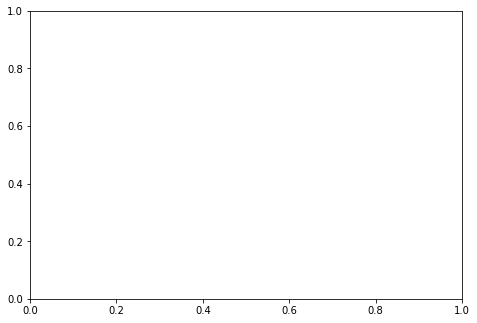

In [8]:
graph_generator = DataGenerator(num_scenarios=3, dump_dir=data_path, params=params)
scenario_data = graph_generator.run_scenarios()
# Window popping up due to MPViewer of BARK lib - not our fault!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

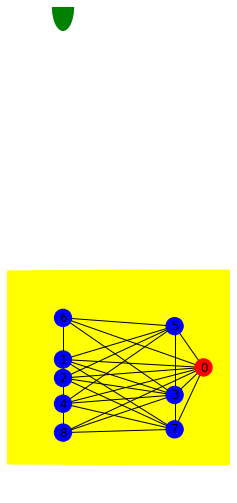

In [11]:
# Select random data_point from data_set
data_point = random.choice(random.choice(scenario_data))
observation = data_point["graph"]
graph = GraphObserver.graph_from_observation(observation)

# Visualize datapoint (graph data)
fig = plt.figure(figsize=(4,9))
ax  = fig.add_subplot(111)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
visualize_graph(data_point, ax, visible_distance, normalization_ref_highway)

The image from above shows the perceived environment from the agent's perspective in graph structure:
- the red node is the $\color{red}{\text{controlled/ego agent}}$
- the blue agents are $\color{blue}{\text{other agents which are not controlled}}$
- the yellow zone indicates the <mark>area that agents are visible to the ego agent<mark>. Visibility is further indicated by the missing connections to agents outside the zone
- the green point shows the $\color{green}{\text{goal of the ego agent}}$

About every other agent that the ego agent is perceiving (and about itself) the following information are represented in the individual node features:
- Position -> $x$ and $y$-Coordinates
- Orientation -> $\theta$
- Velocity -> $v$
- Information related to the goal:
    - Position of goal -> $x_{goal}$ and $y_{goal}$-Coordinates
    - Distance to goal -> $dx$ and $dy$ and $d=\sqrt {dx²+dy²}$
    - Necessary orientation at goal position -> $\theta_{goal}$
    - Necessary velocity at goal position -> $v_{goal}$
    
The following cell shows the keys under which the node_features are accessible:

In [10]:
node_features = graph.nodes[1].keys()
node_features

dict_keys(['x', 'y', 'theta', 'vel', 'goal_x', 'goal_y', 'goal_dx', 'goal_dy', 'goal_theta', 'goal_d', 'goal_vel'])

## Chapter 3: Wrapping stuff
- why we have to use wrappers
- how we use them (from what to what)

In [ ]:
#to do

## Chaper 4: Graph Neural Network
- what structure we use
- what layer types, ...

In [13]:
#to do

## Chapter 5: Evaluation of capabilites of actor net
- introduce supervised setting
- benchmark GNN-SAC vs SAC, randomActor and ConstantActor

In [14]:
# to do

## Chapter 6: Reinforcement learning of GNN-SAC
- show commands for training
- benchmark training with normal SAC and possibly with different parameters

## Chapter 7: Summary

## Apendix: Commands 

In [15]:
os.getcwd()

'/home/silvan/.cache/bazel/_bazel_silvan/9feb0a5c10ccf83fd245bd86b828ce9f/execroot/bark_ml/bazel-out/k8-fastbuild/bin/docs/report/run.runfiles/bark_ml/docs/report'

# Run bazel commands from here (no visualizations)

In [16]:
!pwd

/home/silvan/.cache/bazel/_bazel_silvan/9feb0a5c10ccf83fd245bd86b828ce9f/execroot/bark_ml/bazel-out/k8-fastbuild/bin/docs/report/run.runfiles/bark_ml/docs/report


!cd /home/silvan/working_bark && bazel run //examples:tfa

In [17]:
!cd /home/silvan/working_bark && bazel run //examples:tfa

Loading: 
Loading: 0 packages loaded
Analyzing: target //examples:tfa (1 packages loaded, 0 targets configured)
Analyzing: target //examples:tfa (3 packages loaded, 3 targets configured)
    currently loading: @remote_java_tools_linux//
Analyzing: target //examples:tfa (4 packages loaded, 8 targets configured)
    Fetching @local_jdk; fetching
Analyzing: target //examples:tfa (5 packages loaded, 150 targets configured)
INFO: Analyzed target //examples:tfa (5 packages loaded, 172 targets configured).

INFO: Found 1 target...

[0 / 1] [Prepa] BazelWorkspaceStatusAction stable-status.txt
Target //examples:tfa up-to-date:
[4 / 4] checking cached actions
  bazel-bin/examples/tfa
[4 / 4] checking cached actions
INFO: Elapsed time: 2.180s, Critical Path: 0.01s
[4 / 4] checking cached actions
INFO: 0 processes.
[4 / 4] checking cached actions
INFO: Build completed successfully, 1 total action
INFO: Running command line: external/bazel_tools/tools/test/test-setup.sh examples/tfa
INFO: Build com